In [1]:
import json
import pickle
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch

Text(7, 5, 'F: Biochemical, mutant')

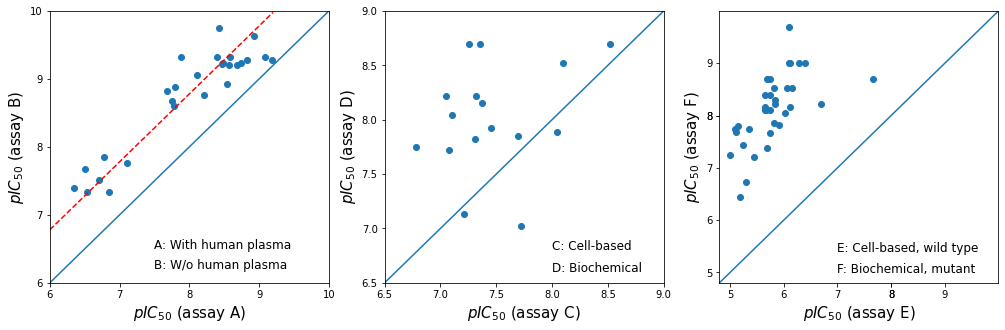

In [2]:
# Figure 2
# Illustrate the heterogeneity effect from paired assays
# A-B  CHEMBL1039373, CHEMBL1039372
# C-D  CHEMBL2073500, CHEMBL2073498
# E-F  CHEMBL3804127, CHEMBL3804128
data = json.load(open("data/assay_data.json","r"))

assay_A = sorted(data["603748"])  #CHEMBL1039373
assay_B = sorted(data["603747"])  #CHEMBL1039372

A_B_common_ligand = set([row[0] for row in assay_A]).intersection(set([row[0] for row in assay_B]))
assay_A_value = -np.log10([float(i[-1]) for i in assay_A if i[0] in A_B_common_ligand]) + 9
assay_B_value = -np.log10([float(i[-1]) for i in assay_B if i[0] in A_B_common_ligand]) + 9

assay_C = sorted(data["835008"])
assay_D = sorted(data["835006"])
C_D_common_ligand = set([row[0] for row in assay_C]).intersection(set([row[0] for row in assay_D]))
assay_C_value = -np.log10([float(i[-1]) for i in assay_C if i[0] in C_D_common_ligand]) + 9
assay_D_value = -np.log10([float(i[-1]) for i in assay_D if i[0] in C_D_common_ligand]) + 9

assay_E = sorted(data["1574502"])
assay_F = sorted(data["1574501"])
E_F_common_ligand = set([row[0] for row in assay_E]).intersection(set([row[0] for row in assay_F]))
assay_E_value = -np.log10([float(i[-1]) for i in assay_E if i[0] in E_F_common_ligand]) + 9
assay_F_value = -np.log10([float(i[-1]) for i in assay_F if i[0] in E_F_common_ligand]) + 9


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,5))
ax1.scatter(assay_A_value, assay_B_value)
ax1.set_xlim(6,10)
ax1.set_ylim(6,10)
ax1.set_xticks([6,7,8,9,10])
ax1.set_yticks([6,7,8,9,10])
ax1.plot([6,10],[6,10])
ax1.plot([6,9.2],[6.78,9.98], color="r", linestyle="--")
ax1.set_xlabel(r"$pIC_{50}$ (assay A)", fontsize=15)
ax1.set_ylabel(r"$pIC_{50}$ (assay B)", fontsize=15)
ax1.text(7.5, 6.5, "A: With human plasma", fontsize=12)
ax1.text(7.5, 6.2, "B: W/o human plasma", fontsize=12)

ax2.scatter(assay_C_value, assay_D_value)
ax2.set_xlim(6.5,9)
ax2.set_ylim(6.5,9)
ax2.set_xticks([6.5,7,7.5,8,8.5,9])
ax2.set_yticks([6.5,7,7.5,8,8.5,9])
ax2.plot([6.5,9],[6.5,9])
ax2.set_xlabel(r"$pIC_{50}$ (assay C)", fontsize=15)
ax2.set_ylabel(r"$pIC_{50}$ (assay D)", fontsize=15)
ax2.text(8, 6.8, "C: Cell-based", fontsize=12)
ax2.text(8, 6.6, "D: Biochemical", fontsize=12)


ax3.scatter(assay_E_value, assay_F_value)
ax3.set_xlim(4.8,10)
ax3.set_ylim(4.8,10)
ax3.set_xticks([5,6,7,8,8,9])
ax3.set_yticks([5,6,7,8,8,9])
ax3.plot([4.5,10],[4.5,10])
ax3.set_xlabel(r"$pIC_{50}$ (assay E)", fontsize=15)
ax3.set_ylabel(r"$pIC_{50}$ (assay F)", fontsize=15)
ax3.text(7, 5.4, "E: Cell-based, wild type", fontsize=12)
ax3.text(7, 5, "F: Biochemical, mutant", fontsize=12)

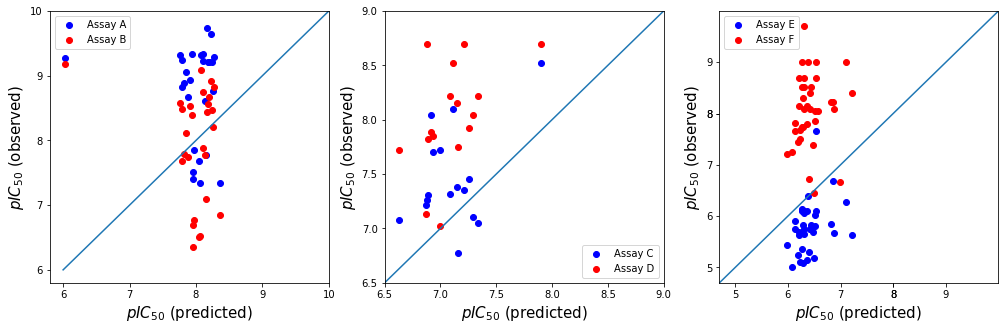

In [3]:
# Figure 2 (Continued)
# Standard Model Prediction
standard_model_paired_prediction = pickle.load(open("evaluations/aggregated_model_paired_evaluation.pkl","rb"))

assay_A_raw, assay_A_pred, _ = standard_model_paired_prediction["B-603748--603747"]
assay_B_raw, assay_B_pred, _ = standard_model_paired_prediction["A-603748--603747"]
assay_A_obs, assay_B_obs = -np.log10([i[-1] for i in assay_A_raw]) + 9, -np.log10([i[-1] for i in assay_B_raw]) + 9
assay_A_pred_np, assay_B_pred_np = assay_A_pred.detach().numpy().flatten() + 6.83, assay_B_pred.detach().numpy().flatten() + 6.83

assay_ab_pred_concat = np.concatenate([assay_A_pred_np, assay_B_pred_np])
assay_ab_obs_concat = np.concatenate([assay_A_obs, assay_B_obs])
assay_ab_pair = np.vstack([assay_ab_pred_concat,assay_ab_obs_concat])

assay_C_raw, assay_C_pred, _ = standard_model_paired_prediction["B-835006--835008"]
assay_D_raw, assay_D_pred, _ = standard_model_paired_prediction["A-835006--835008"]
assay_C_obs, assay_D_obs = -np.log10([i[-1] for i in assay_C_raw]) + 9, -np.log10([i[-1] for i in assay_D_raw]) + 9
assay_C_pred_np, assay_D_pred_np = assay_C_pred.detach().numpy().flatten() + 6.83, assay_D_pred.detach().numpy().flatten() + 6.83

assay_cd_pred_concat = np.concatenate([assay_C_pred_np, assay_D_pred_np])
assay_cd_obs_concat = np.concatenate([assay_C_obs, assay_D_obs])
assay_cd_pair = np.vstack([assay_cd_pred_concat,assay_cd_obs_concat])

standard_model_mutant_prediction = pickle.load(open("evaluations/aggregated_model_mutant_evaluation.pkl","rb"))
assay_E_raw, assay_E_pred, _ = standard_model_mutant_prediction["A-1574502--1574501"]
assay_F_raw, assay_F_pred, _ = standard_model_mutant_prediction["B-1574502--1574501"]
assay_E_obs = -np.log10([i[-1] for i in assay_E_raw]) + 9
assay_F_obs = -np.log10([i[-1] for i in assay_F_raw]) + 9
assay_E_pred_np = assay_E_pred.detach().numpy().flatten() + 6.83
assay_F_pred_np = assay_F_pred.detach().numpy().flatten() + 6.83

assay_ef_pred_concat = np.concatenate([assay_E_pred_np, assay_F_pred_np])
assay_ef_obs_concat = np.concatenate([assay_E_obs, assay_F_obs])
assay_ef_pair = np.vstack([assay_ef_pred_concat,assay_ef_obs_concat])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,5))

ax1.scatter(assay_A_pred_np, assay_A_obs, label="Assay A", color="blue")
ax1.scatter(assay_B_pred_np, assay_B_obs, label="Assay B", color="red")
ax1.set_xlim(5.8,10)
ax1.set_ylim(5.8,10)
ax1.set_xticks([6,7,8,9,10])
ax1.set_yticks([6,7,8,9,10])
ax1.plot([6,10],[6,10])
ax1.set_xlabel(r"$pIC_{50}$ (predicted)", fontsize=15)
ax1.set_ylabel(r"$pIC_{50}$ (observed)", fontsize=15)
ax1.legend()


ax2.scatter(assay_C_pred_np, assay_C_obs, label="Assay C", color="blue")
ax2.scatter(assay_D_pred_np, assay_D_obs, label="Assay D", color="red")
ax2.set_xlim(6.5,9)
ax2.set_ylim(6.5,9)
ax2.set_xticks([6.5,7,7.5,8,8.5,9])
ax2.set_yticks([6.5,7,7.5,8,8.5,9])
ax2.plot([6.5,9],[6.5,9])
ax2.set_xlabel(r"$pIC_{50}$ (predicted)", fontsize=15)
ax2.set_ylabel(r"$pIC_{50}$ (observed)", fontsize=15)
ax2.legend()

ax3.scatter(assay_E_pred_np, assay_E_obs, label="Assay E", color="blue")
ax3.scatter(assay_F_pred_np, assay_F_obs, label="Assay F", color="red")
ax3.plot([4.7,10],[4.7,10])
ax3.set_xlim(4.7,10)
ax3.set_ylim(4.7,10)
ax3.set_xticks([5,6,7,8,8,9])
ax3.set_yticks([5,6,7,8,8,9])
ax3.set_xlabel(r"$pIC_{50}$ (predicted)", fontsize=15)
ax3.set_ylabel(r"$pIC_{50}$ (observed)", fontsize=15)
ax3.legend()
plt.show()


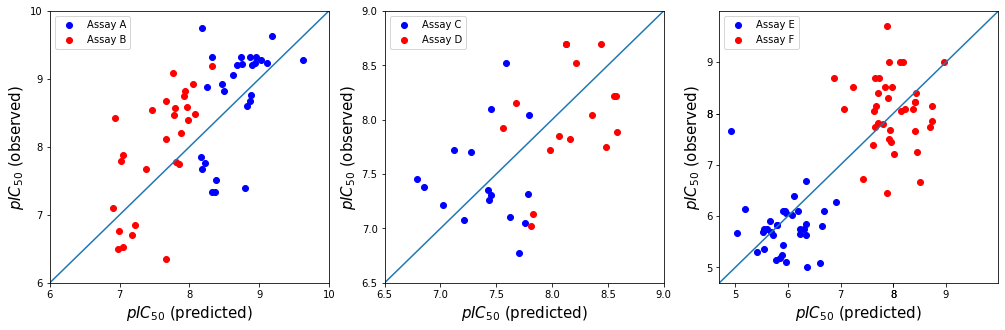

In [4]:
# Figure 2 (Continued)
# Meta Model Prediction
# Note the prediction may look slightly different in every run 
# as different support set of compounds are used in meta-prediction  

meta_paired_full_prediction = pickle.load(open("evaluations/meta_model_paired_evaluation.pkl","rb"))

assay_A_raw, _, _, assay_A_pred = meta_paired_full_prediction["B-603748--603747"]
assay_B_raw, _, _, assay_B_pred = meta_paired_full_prediction["A-603748--603747"]
assay_A_obs, assay_B_obs = -np.log10([i[-1] for i in assay_A_raw]) + 9, -np.log10([i[-1] for i in assay_B_raw]) + 9
assay_A_pred_np, assay_B_pred_np = assay_A_pred.detach().numpy().flatten() + 6.83, assay_B_pred.detach().numpy().flatten() + 6.83

assay_ab_pred_concat = np.concatenate([assay_A_pred_np, assay_B_pred_np])
assay_ab_obs_concat = np.concatenate([assay_A_obs, assay_B_obs])
assay_ab_pair = np.vstack([assay_ab_pred_concat,assay_ab_obs_concat])


assay_C_raw, _, _, assay_C_pred = meta_paired_full_prediction["B-835006--835008"]
assay_D_raw, _, _, assay_D_pred = meta_paired_full_prediction["A-835006--835008"]
assay_C_obs, assay_D_obs = -np.log10([i[-1] for i in assay_C_raw]) + 9, -np.log10([i[-1] for i in assay_D_raw]) + 9
assay_C_pred_np, assay_D_pred_np = assay_C_pred.detach().numpy().flatten() + 6.83, assay_D_pred.detach().numpy().flatten() + 6.83

assay_cd_pred_concat = np.concatenate([assay_C_pred_np, assay_D_pred_np])
assay_cd_obs_concat = np.concatenate([assay_C_obs, assay_D_obs])
assay_cd_pair = np.vstack([assay_cd_pred_concat,assay_cd_obs_concat])


mutant = pickle.load(open("evaluations/meta_model_mutant_evaluation.pkl","rb"))
assay_E_raw, _, _, assay_E_pred = mutant["A-1574502--1574501"]
assay_F_raw, _, _, assay_F_pred = mutant["B-1574502--1574501"]
assay_E_obs = -np.log10([i[-1] for i in assay_E_raw]) + 9
assay_F_obs = -np.log10([i[-1] for i in assay_F_raw]) + 9
assay_E_pred_np = assay_E_pred.detach().numpy().flatten() + 6.83
assay_F_pred_np = assay_F_pred.detach().numpy().flatten() + 6.83

assay_ef_pred_concat = np.concatenate([assay_E_pred_np, assay_F_pred_np])
assay_ef_obs_concat = np.concatenate([assay_E_obs, assay_F_obs])
assay_ef_pair = np.vstack([assay_ef_pred_concat,assay_ef_obs_concat])


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,5))

ax1.scatter(assay_A_pred_np, assay_A_obs, label="Assay A", color="blue")
ax1.scatter(assay_B_pred_np, assay_B_obs, label="Assay B", color="red")
ax1.set_xlim(6,10)
ax1.set_ylim(6,10)
ax1.set_xticks([6,7,8,9,10])
ax1.set_yticks([6,7,8,9,10])
ax1.plot([6,10],[6,10])
ax1.set_xlabel(r"$pIC_{50}$ (predicted)", fontsize=15)
ax1.set_ylabel(r"$pIC_{50}$ (observed)", fontsize=15)
ax1.legend()

ax2.scatter(assay_C_pred_np, assay_C_obs, label="Assay C", color="blue")
ax2.scatter(assay_D_pred_np, assay_D_obs, label="Assay D", color="red")
ax2.set_xlim(6.5,9)
ax2.set_ylim(6.5,9)
ax2.set_xticks([6.5,7,7.5,8,8.5,9])
ax2.set_yticks([6.5,7,7.5,8,8.5,9])
ax2.plot([6.5,9],[6.5,9])
ax2.set_xlabel(r"$pIC_{50}$ (predicted)", fontsize=15)
ax2.set_ylabel(r"$pIC_{50}$ (observed)", fontsize=15)
ax2.legend()

ax3.scatter(assay_E_pred_np, assay_E_obs, label="Assay E", color="blue")
ax3.scatter(assay_F_pred_np, assay_F_obs, label="Assay F", color="red")
ax3.plot([4.7,10],[4.7,10])
ax3.set_xlim(4.7,10)
ax3.set_ylim(4.7,10)
ax3.set_xticks([5,6,7,8,8,9])
ax3.set_yticks([5,6,7,8,8,9])
ax3.set_xlabel(r"$pIC_{50}$ (predicted)", fontsize=15)
ax3.set_ylabel(r"$pIC_{50}$ (observed)", fontsize=15)
ax3.legend()
plt.show()

In [5]:
# Chronological 
meta_chronological_full_prediction = pickle.load(open("evaluations/meta_model_chronological_evaluation.pkl","rb"))

meta_chronological_prediction = np.concatenate([item[-1].flatten().detach().numpy() for key, item in meta_chronological_full_prediction.items()])
chronological_observed = np.array([i[-1] for key, item in meta_chronological_full_prediction.items() for i in item[0]])

meta_chronological_true_prediction = np.vstack([-np.log10(chronological_observed) + 2.17, 
                                                meta_chronological_prediction])

chronological_kde = gaussian_kde(meta_chronological_true_prediction)
chronological_score = chronological_kde.evaluate(meta_chronological_true_prediction)

In [6]:
# Paired
meta_paired_prediction = np.concatenate([item[-1].flatten().detach().numpy() for key, item in meta_paired_full_prediction.items()])
paired_observed = np.array([i[-1] for key, item in meta_paired_full_prediction.items() for i in item[0]])

meta_paired_true_prediction = np.vstack([-np.log10(paired_observed) + 2.17, 
                                                meta_paired_prediction])

paired_kde = gaussian_kde(meta_paired_true_prediction)
paired_score = paired_kde.evaluate(meta_paired_true_prediction)

paired_observed_diff, paired_predicted_diff = [], []
paired_keys = list(meta_paired_full_prediction.keys())
for i in range(0, len(paired_keys), 2):
    pair_A, pair_B = meta_paired_full_prediction[paired_keys[i]], meta_paired_full_prediction[paired_keys[i+1]]
    pair_A_obs, pair_B_obs = np.array([j[-1] for j in pair_A[0]]), np.array([j[-1] for j in pair_B[0]])
    pair_A_pred, pair_B_pred = pair_A[-1], pair_B[-1]
    pred_diff = (pair_A_pred - pair_B_pred).detach().numpy().flatten().tolist()
    obs_diff = (-np.log10(pair_A_obs) + np.log10(pair_B_obs)).tolist()
    paired_observed_diff += obs_diff
    paired_predicted_diff += pred_diff
    
paired_diff_pair = np.vstack([paired_predicted_diff, paired_observed_diff])
paired_diff_kde = gaussian_kde(paired_diff_pair)
paired_diff_score = paired_diff_kde(paired_diff_pair)

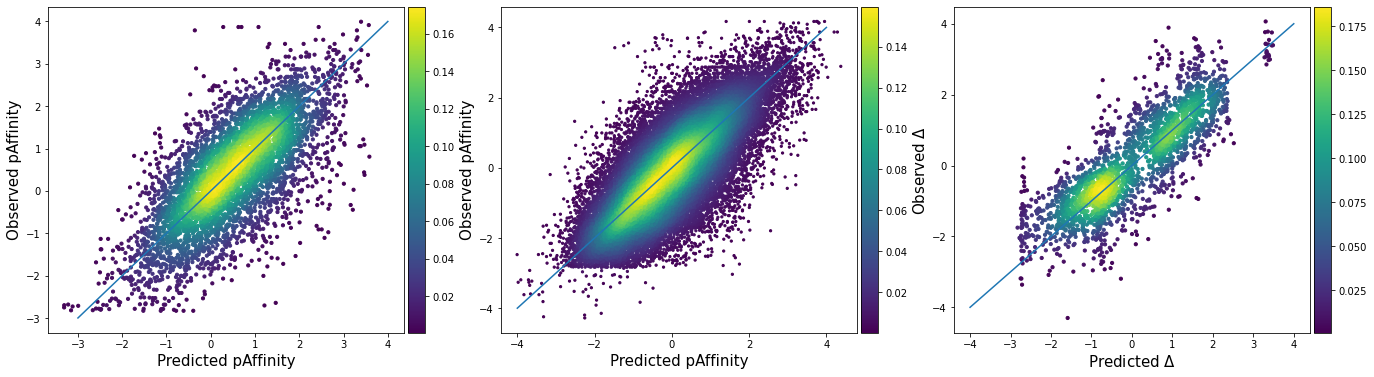

In [7]:
# Figure 4
# Correlation plot
# Similar reason. Different support set give slightly different prediction.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(23,6))

im1 = ax1.scatter(meta_paired_prediction, -np.log10(paired_observed) + 2.17, c=paired_score, s=10)
ax1.plot([-3,4],[-3,4])
ax1.set_xlabel("Predicted pAffinity",fontsize=15)
ax1.set_ylabel("Observed pAffinity", fontsize=15)
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation="vertical")


im2 = ax2.scatter(meta_chronological_prediction, -np.log10(chronological_observed) + 2.17, c=chronological_score, s=5)
ax2.plot([-4,4],[-4,4])
ax2.set_xlabel("Predicted pAffinity",fontsize=15)
ax2.set_ylabel("Observed pAffinity", fontsize=15)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation="vertical")

im3 = ax3.scatter(paired_predicted_diff, paired_observed_diff, c=paired_diff_score, s=10)
ax3.plot([-4,4],[-4,4])
ax3.set_xlabel(r"Predicted $\Delta$",fontsize=15)
ax3.set_ylabel(r"Observed $\Delta$", fontsize=15)
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation="vertical")

plt.show()

In [8]:
from collections import Counter
from scipy.stats import kendalltau
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors

# Appendix
# Ligand Info
chembl_30 = open("data/chembl_30.txt","r").readlines()
molecules = set([line.split("\n")[0].split(",")[2] for line in chembl_30[1:]])
bao_endpoint = []
for line in chembl_30[1:]:
    lineinfo = line.split("\n")[0].split(",")
    bao_endpoint.append((lineinfo[1], lineinfo[5], lineinfo[6]))
values = [float(line.split("\n")[0].split(",")[-1]) for line in chembl_30[1:]]

# ChEMBL protein family definition is used here
assay_target_info = open("data/Assay_Target_Info.txt","r").readlines()[1:]

target_class_record, sequence_length, sequence_set = [], [], set()
for line in assay_target_info:
    aid, bao, tid, seqlen, target_class = line.split("\n")[0].split(",")
    if tid not in sequence_set:
        sequence_set.add(tid)
        sequence_length.append(int(seqlen))
    target_class_record.append(target_class)
    
# Biochemical  BAO_0000224, BAO_0000357
# Cell-Based  BAO_0000],219 
# Tissue-based BAO_0000221
# Sub-celluar BAO_0000220
# Cell Membrane BAO_0000249
# Microsome    BAO_0000251
# Cell-Free   BAO_0000366
# Unknown     BAO_0000019
bao_endpoint_count = {"Biochemical":{"Ki":0, "IC50":0, "Kd":0, "EC50":0}, 
                      "Cell-Based":{"Ki":0, "IC50":0, "Kd":0, "EC50":0}, 
                      "Tissue":{"Ki":0, "IC50":0, "Kd":0, "EC50":0}, 
                      "Cell-Free":{"Ki":0, "IC50":0," Kd":0, "EC50":0}, 
                      "Unclassified":{"Ki":0, "IC50":0,"Kd":0, "EC50":0}}
for line in bao_endpoint:
    aid, bao, endpoint = line
    if bao in ["BAO_0000224", "BAO_0000357"]:
        bao_endpoint_count["Biochemical"][endpoint] += 1
    elif bao == "BAO_0000219":
        bao_endpoint_count["Cell-Based"][endpoint] += 1
    elif bao == "BAO_0000366":
        bao_endpoint_count["Cell-Free"][endpoint] += 1
    elif bao == "BAO_0000221":
        bao_endpoint_count["Tissue"][endpoint] += 1
    else:
        bao_endpoint_count["Unclassified"][endpoint] += 1

/home/lchan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/lchan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


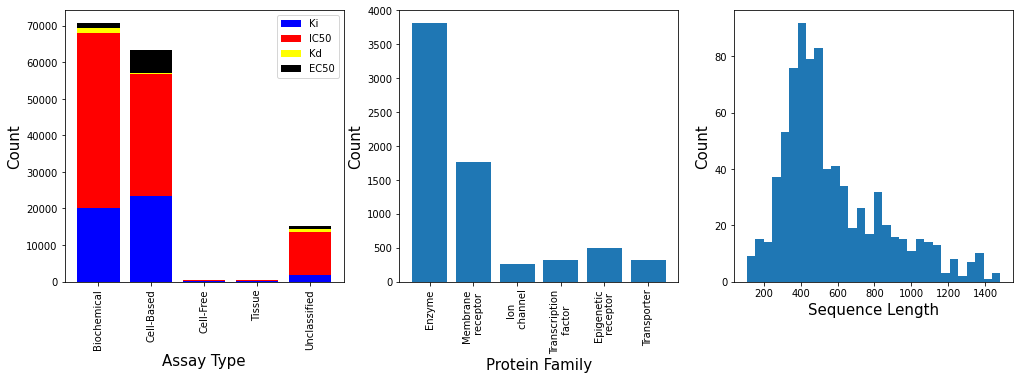

In [9]:
# Assay and Target Summary 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,5))
# Assay type and endpoint count
biochemical = np.array(list(bao_endpoint_count["Biochemical"].values()))
cell_based = np.array(list(bao_endpoint_count["Cell-Based"].values()))
cell_free = np.array(list(bao_endpoint_count["Cell-Free"].values()))
tissue = np.array(list(bao_endpoint_count["Tissue"].values()))
unclassified = np.array(list(bao_endpoint_count["Unclassified"].values()))
colorlist = ["blue","red", "yellow", "black"]
cumlabel = ["Ki","IC50","Kd","EC50"]
for i in range(4):
    if i == 0:
        ax1.bar(["Biochemical","Cell-Based", "Cell-Free", "Tissue", "Unclassified"], 
                [biochemical[i], cell_based[i], cell_free[i], tissue[i], unclassified[i]], color=colorlist[0], label=cumlabel[0])
    else:
        ax1.bar(["Biochemical","Cell-Based", "Cell-Free", "Tissue", "Unclassified"], 
                [biochemical[i], cell_based[i], cell_free[i], tissue[i], unclassified[i]],
                bottom = [np.cumsum(biochemical)[i-1], np.cumsum(cell_based)[i-1], np.cumsum(cell_free)[i-1],
                         np.cumsum(tissue)[i-1], np.cumsum(unclassified)[i-1]],  color=colorlist[i], label=cumlabel[i])

ax1.set_xticklabels(["Biochemical","Cell-Based", "Cell-Free", "Tissue", "Unclassified"], rotation=90)
ax1.set_xlabel("Assay Type", fontsize=15)
ax1.set_ylabel("Count", fontsize=15)
ax1.legend()

target_class_counter = Counter(target_class_record)
target_class_name, target_class_count = list(target_class_counter.keys()), list(target_class_counter.values())
ax2.bar(target_class_name, target_class_count)
ax2.set_xticklabels(["Enzyme", "Membrane\n receptor", "Ion\n channel", "Transcription\n factor", 
                     "Epigenetic\n receptor", "Transporter"], rotation=90)
ax2.set_xlabel("Protein Family", fontsize=15)
ax2.set_ylabel("Count", fontsize=15)

ax3.hist(sequence_length, bins=30)
ax3.set_ylabel("Count",fontsize=15)
ax3.set_xlabel("Sequence Length", fontsize=15)
plt.show()

In [10]:
molwt, natoms = [], []
for smi in molecules:
    mol = Chem.MolFromSmiles(smi)
    molwt.append(Descriptors.MolWt(mol))
    natoms.append(mol.GetNumAtoms())

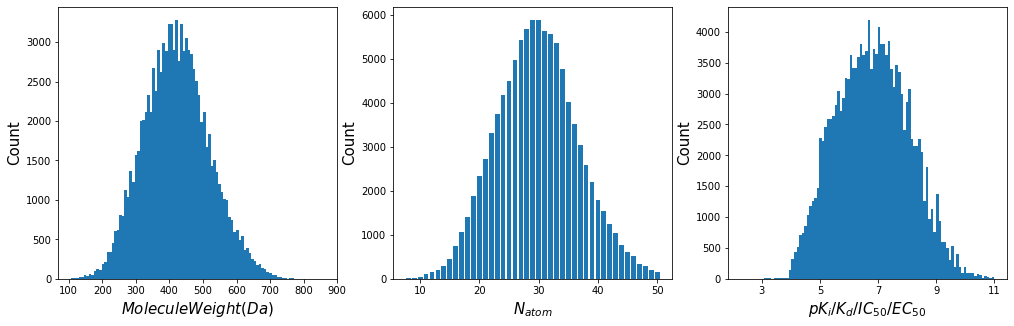

In [11]:
# Molecule Summary 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,5))
# Molecule Weight
ax1.hist(molwt, bins=100)
ax1.set_xlabel(r"$Molecule Weight (Da)$", fontsize=15)
ax1.set_ylabel("Count", fontsize=15)

# Molecule Number of Heavy Atoms
natoms_count_dict = Counter(natoms)
n_atoms = list(natoms_count_dict.keys())
n_atoms_count = list(natoms_count_dict.values())
ax2.bar(n_atoms, n_atoms_count)
ax2.set_xlabel(r"$N_{atom}$", fontsize=15)
ax2.set_ylabel("Count", fontsize=15)


# Activity Summary
ax3.hist(-np.log10(values) + 9, bins=100)
ax3.set_xlabel(r"$pK_{i}/K_{d}/IC_{50}/EC_{50}$", fontsize=15)
ax3.set_ylabel("Count", fontsize=15)
ax3.set_xticks([3,5,7,9,11])

plt.show()

In [12]:
# Paired Assay Test
paired_assay = json.load(open("data/PairedSplit/paired_test.json","r"))
pearson, tau, diff, nobs = [], [], [], []
for key, item in paired_assay.items():
    size = len(item[0])
    i0, i1 = -np.log10([i[-1] for i in item[0]]).reshape(size, 1), -np.log10([i[-1] for i in item[1]]).reshape(size, 1)
    stack = np.hstack([i0,i1])
    nobs.append(size)
    pearson.append(np.corrcoef(stack.transpose())[0,1])
    tau.append(kendalltau(stack[:,0], stack[:,1])[0])
    diff.append(np.abs(stack[:,0] - stack[:,1]).mean())
    

Text(0, 0.5, 'Count')

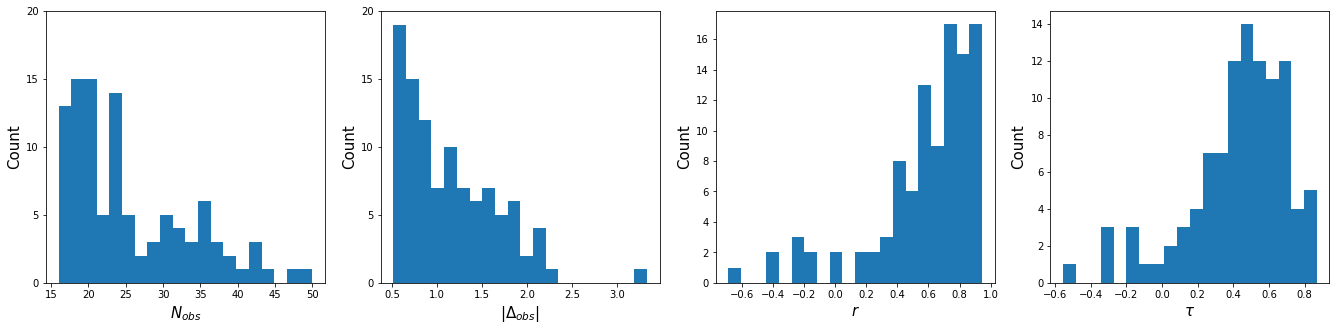

In [13]:
# Figure S2 paired assay test set
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(23,5))
ax1.hist(nobs, bins=20)
ax1.set_xlabel(r"$N_{obs}$", fontsize=15)
ax1.set_ylabel("Count", fontsize=15)
ax1.set_yticks([0, 5, 10, 15, 20])

ax2.hist(diff, bins=20)
ax2.set_xlabel(r"$|\Delta_{obs}|$", fontsize=15)
ax2.set_ylabel("Count", fontsize=15)
ax2.set_yticks([0, 5, 10, 15, 20])

ax3.hist(pearson, bins=20)
ax3.set_xlabel(r"$r$", fontsize=15)
ax3.set_ylabel("Count", fontsize=15)

ax4.hist(tau, bins=20)
ax4.set_xlabel(r"$\tau$", fontsize=15)
ax4.set_ylabel("Count", fontsize=15)

In [14]:
# Correlation of Standard and Local Model
# Paired
standard_and_local_model_paired_prediction = pickle.load(open("evaluations/aggregated_model_paired_evaluation.pkl","rb"))

standard_paired_prediction = [item[-2].flatten().detach().numpy() 
                                    for key, item in standard_and_local_model_paired_prediction.items()]
local_paired_prediction = [item[-1].flatten().detach().numpy()
                          for key, item in standard_and_local_model_paired_prediction.items()]
paired_observed_value = -np.log10([i[-1] for key, item in standard_and_local_model_paired_prediction.items() 
                        for i in item[0]]) + 2.17

standard_pred_obs_paired_stack = np.vstack([paired_observed_value, 
                                            np.concatenate(standard_paired_prediction)])
local_pred_obs_paired_stack = np.vstack([paired_observed_value, 
                                        np.concatenate(local_paired_prediction)])

standard_pred_obs_paired_kde = gaussian_kde(standard_pred_obs_paired_stack)
local_pred_obs_paired_kde = gaussian_kde(local_pred_obs_paired_stack)

standard_pred_obs_paired_score = standard_pred_obs_paired_kde.evaluate(standard_pred_obs_paired_stack)
local_pred_obs_paired_score = local_pred_obs_paired_kde.evaluate(local_pred_obs_paired_stack)


# Chronological
standard_and_local_model_chronological = pickle.load(open("evaluations/aggregated_model_chronological_evaluation.pkl","rb"))

standard_chronological_prediction = [item[-2].flatten().detach().numpy() 
                                    for key, item in standard_and_local_model_chronological.items()]
local_chronological_prediction = [item[-1].flatten().detach().numpy()
                                 for key, item in standard_and_local_model_chronological.items()]
chronological_observed_value = -np.log10([i[-1] for key, item in standard_and_local_model_chronological.items() 
                               for i in item[0]]) + 2.17

standard_pred_obs_chronological_stack = np.vstack([chronological_observed_value, 
                                                   np.concatenate(standard_chronological_prediction)])
local_pred_obs_chronological_stack = np.vstack([chronological_observed_value, 
                                                np.concatenate(local_chronological_prediction)])

standard_pred_obs_chronological_kde = gaussian_kde(standard_pred_obs_chronological_stack)
local_pred_obs_chronological_kde = gaussian_kde(local_pred_obs_chronological_stack)

standard_pred_obs_chronological_score = standard_pred_obs_chronological_kde.evaluate(standard_pred_obs_chronological_stack)
local_pred_obs_chronological_score = local_pred_obs_chronological_kde.evaluate(local_pred_obs_chronological_stack)


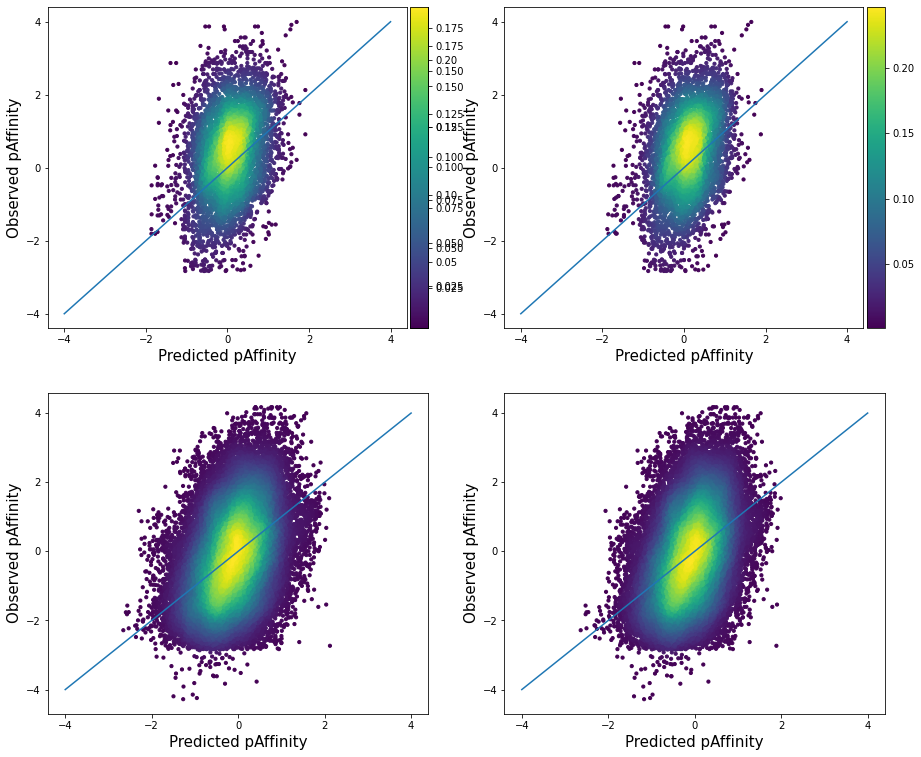

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,13))

im1 = ax1.scatter(standard_pred_obs_paired_stack[1], standard_pred_obs_paired_stack[0], c=standard_pred_obs_paired_score, s=10)
ax1.plot([-4,4],[-4,4])
ax1.set_xlabel("Predicted pAffinity",fontsize=15)
ax1.set_ylabel("Observed pAffinity", fontsize=15)
ax1.set_xticks([-4,-2,0,2,4])
ax1.set_yticks([-4,-2,0,2,4])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation="vertical")


im2 = ax2.scatter(local_pred_obs_paired_stack[1], local_pred_obs_paired_stack[0], c=local_pred_obs_paired_score, s=10)
ax2.plot([-4,4],[-4,4])
ax2.set_xlabel("Predicted pAffinity",fontsize=15)
ax2.set_ylabel("Observed pAffinity", fontsize=15)
ax2.set_xticks([-4,-2,0,2,4])
ax2.set_yticks([-4,-2,0,2,4])
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation="vertical")


im3 = ax3.scatter(standard_pred_obs_chronological_stack[1], standard_pred_obs_chronological_stack[0], c=standard_pred_obs_chronological_score, s=10)
ax3.plot([-4,4],[-4,4])
ax3.set_xlabel("Predicted pAffinity",fontsize=15)
ax3.set_ylabel("Observed pAffinity", fontsize=15)
ax3.set_xticks([-4,-2,0,2,4])
ax3.set_yticks([-4,-2,0,2,4])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation="vertical")

im4 = ax4.scatter(local_pred_obs_chronological_stack[1], local_pred_obs_chronological_stack[0], c=local_pred_obs_chronological_score, s=10)
ax4.plot([-4,4],[-4,4])
ax4.set_xlabel("Predicted pAffinity",fontsize=15)
ax4.set_ylabel("Observed pAffinity", fontsize=15)
ax4.set_xticks([-4,-2,0,2,4])
ax4.set_yticks([-4,-2,0,2,4])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im4, cax=cax, orientation="vertical")
plt.show()